In [1]:
#%% relevant paths
data='/home/mfeldmann/data/'
figs='/home/mfeldmann/figs/domino/'
scr_data='/scratch2/mfeldmann/era_clim/'
code='/home/mfeldmann/code/'
import sys, os, glob
sys.path.append(code)
import numpy as np
import xarray as xr
import pandas as pd
import datetime as dt
#from dask.distributed import Client, LocalCluster
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import library.utils as utils
import library.io as io
import skimage.morphology as skimo
from scipy.ndimage import convolve
from skimage.measure import label, regionprops
from scipy.ndimage import binary_erosion
import copy

In [3]:
# tracked_regions = xr.open_dataarray(scr_data+'hw_obj.nc')
files = sorted(glob.glob(scr_data+'*hw_obj.csv'))
a1=0
for file in files:
    if a1==0:
        tracked_properties = pd.read_csv(file)
        print(tracked_properties.shape)
    else:
        tracked_properties_2 =  pd.read_csv(file)
        print(tracked_properties_2.shape)
        tracked_properties = pd.concat([tracked_properties,tracked_properties_2])
        print(tracked_properties.shape)
    a1+=1
tracked_properties = tracked_properties.drop(columns='Unnamed: 0')

print(tracked_properties.shape)
tracked_properties.to_csv(scr_data+'hw_obj.csv')

(594, 8)
(463, 8)
(1057, 8)
(522, 8)
(1579, 8)
(443, 8)
(2022, 8)
(479, 8)
(2501, 8)
(359, 8)
(2860, 8)
(521, 8)
(3381, 8)
(527, 8)
(3908, 8)
(584, 8)
(4492, 8)
(489, 8)
(4981, 8)
(540, 8)
(5521, 8)
(548, 8)
(6069, 8)
(434, 8)
(6503, 8)
(480, 8)
(6983, 8)
(491, 8)
(7474, 8)
(508, 8)
(7982, 8)
(511, 8)
(8493, 8)
(511, 8)
(9004, 8)
(551, 8)
(9555, 8)
(495, 8)
(10050, 8)
(495, 8)
(10545, 8)
(614, 8)
(11159, 8)
(649, 8)
(11808, 8)
(455, 8)
(12263, 8)
(538, 8)
(12801, 8)
(707, 8)
(13508, 8)
(522, 8)
(14030, 8)
(547, 8)
(14577, 8)
(569, 8)
(15146, 8)
(109, 8)
(15255, 8)
(437, 8)
(15692, 8)
(501, 8)
(16193, 8)
(488, 8)
(16681, 8)
(421, 8)
(17102, 8)
(399, 8)
(17501, 8)
(564, 8)
(18065, 8)
(18065, 7)


In [33]:
tracked_regions = xr.open_dataarray(scr_data+'conv_obj.nc')
files = sorted(glob.glob(scr_data+'preprocessing/*conv_obj.csv'))
a1=0
for file in files:
    if a1==0:
        tracked_properties = pd.read_csv(file)
        print(tracked_properties.shape)
    else:
        tracked_properties_2 =  pd.read_csv(file)
        print(tracked_properties_2.shape)
        tracked_properties = pd.concat([tracked_properties,tracked_properties_2])
        print(tracked_properties.shape)
    a1+=1
tracked_properties = tracked_properties.drop(columns='Unnamed: 0')

print(tracked_properties.shape)
tracked_properties.to_csv(scr_data+'conv_obj.csv')

(808, 7)
(820, 7)
(1628, 7)
(862, 7)
(2490, 7)
(844, 7)
(3334, 7)
(788, 7)
(4122, 7)
(825, 7)
(4947, 7)
(915, 7)
(5862, 7)
(782, 7)
(6644, 7)
(888, 7)
(7532, 7)
(860, 7)
(8392, 7)
(792, 7)
(9184, 7)
(901, 7)
(10085, 7)
(759, 7)
(10844, 7)
(861, 7)
(11705, 7)
(829, 7)
(12534, 7)
(909, 7)
(13443, 7)
(836, 7)
(14279, 7)
(820, 7)
(15099, 7)
(930, 7)
(16029, 7)
(814, 7)
(16843, 7)
(847, 7)
(17690, 7)
(923, 7)
(18613, 7)
(840, 7)
(19453, 7)
(873, 7)
(20326, 7)
(802, 7)
(21128, 7)
(927, 7)
(22055, 7)
(797, 7)
(22852, 7)
(806, 7)
(23658, 7)
(897, 7)
(24555, 7)
(814, 7)
(25369, 7)
(830, 7)
(26199, 7)
(855, 7)
(27054, 7)
(763, 7)
(27817, 7)
(812, 7)
(28629, 7)
(954, 7)
(29583, 7)
(29583, 6)


In [2]:
#%%
file=np.load(data+'cluster.npz')
arrays=file.files
labels=file['arr_0']
regs=file['arr_1']
ids=file['arr_2']
print(regs, ids)


['HELLEN' 'BENELUX' 'ADRIA' 'ALTA-ITALIA' 'EAST' 'SLAV' 'W-MED' 'MAHGREB'
 'CENTRAL'] [ 2  3  4  5  6  7  8  9 10]
(29583, 7)
1296.0


In [ ]:

label_N = (labels==10)*1.0+(labels==3)*1.0+(labels==7)*1.0
np.unique(label_N)

vars = ['cp','t2m','hw','hwp','msl']
tracked_regions = xr.open_dataarray(scr_data+'conv_obj.nc')
tracked_properties = pd.read_csv(scr_data+'conv_obj.csv')
print(tracked_properties.shape)

ilat = np.round(tracked_properties.ilat.values).astype(int); ilon = np.round(tracked_properties.ilon.values).astype(int)

ireg = label_N[ilat,ilon]
print(np.nansum(ireg))
tracked_properties = tracked_properties[ireg==1]

tracked_properties.ilat = np.round(tracked_properties.ilat).astype(int)
tracked_properties.ilon = np.round(tracked_properties.ilon).astype(int)



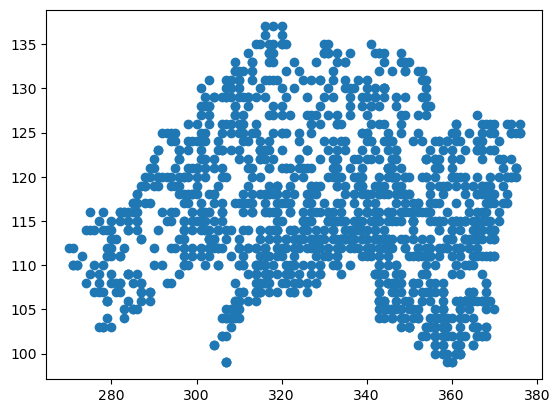

In [3]:
plt.scatter(tracked_properties.ilon,tracked_properties.ilat)

In [34]:

for var in vars[1:2]:
    print(var)

    ds_anom = xr.open_dataarray(scr_data+var+'_anom.nc').load().pad(lon=(0,61),lat=(41,41),constant_values=np.nan)
    ds_std = ds_anom.std(dim='time').load().pad(lon=(0,61),lat=(41,41),constant_values=np.nan)
    ds_abs = xr.open_dataarray(scr_data+var+'_xr.nc').load().pad(lon=(0,61),lat=(41,41),constant_values=np.nan)
    ds_clim = xr.open_dataarray(scr_data+var+'_clim_10d.nc').load().pad(lon=(0,61),lat=(41,41),constant_values=np.nan)


    fill1 = np.zeros([10,80,120,len(tracked_properties)])
    fill2 = np.zeros([80,120,len(tracked_properties)])

    coords1 = {
        'time': np.arange(-5,5,1),  # Time dimension
        'lat': np.arange(-10,10,0.25),  # Latitude dimension
        'lon': np.arange(-15,15,0.25),  # Longitude dimension
        'events': np.arange(len(tracked_properties)),  # Event dimension
    }

    coords2 = {
        'lat': np.arange(-10,10,0.25),  # Latitude dimension
        'lon': np.arange(-15,15,0.25),  # Longitude dimension
        'events': np.arange(len(tracked_properties)),  # Event dimension
    }


    anom_slices = xr.DataArray(copy.deepcopy(fill1), coords=coords1, dims=['time','lat','lon','events'], name=var+'_anomaly')
    abs_slices = xr.DataArray(copy.deepcopy(fill1), coords=coords1, dims=['time','lat','lon','events'], name=var+'_absolute')
    std_slices = xr.DataArray(copy.deepcopy(fill2), coords=coords2, dims=['lat','lon','events'], name=var+'_std')
    clim_slices = xr.DataArray(copy.deepcopy(fill1), coords=coords1, dims=['time','lat','lon','events'], name=var+'_std')
    a2=1
    for props in tracked_properties.iterrows():
        if a2%100==0: print(str(100*a2/len(tracked_properties))+' %')
        a2+=1
        prop = props[1]
        ilat = int(prop.ilat)+41; ilon = int(prop.ilon); time = int(prop.time)
        anom = ds_anom.isel(lat=slice(ilat-40,ilat+40),lon=slice(ilon-60,ilon+60),time=slice(time-5,time+5)).assign_coords(
            time=np.arange(-5, 5, 1),lat=np.arange(-10,10,0.25),lon=np.arange(-15,15,0.25))
        abs = ds_abs.isel(lat=slice(ilat-40,ilat+40),lon=slice(ilon-60,ilon+60),time=slice(time-5,time+5)).assign_coords(
            time=np.arange(-5, 5, 1),lat=np.arange(-10,10,0.25),lon=np.arange(-15,15,0.25))
        std = ds_std.isel(lat=slice(ilat-40,ilat+40),lon=slice(ilon-60,ilon+60)).assign_coords(
            lat=np.arange(-10,10,0.25),lon=np.arange(-15,15,0.25))
        clim = ds_clim.isel(lat=slice(ilat-40,ilat+40),lon=slice(ilon-60,ilon+60),
            dayofyear=(anom.time.dayofyear.values - ds_clim.isel(dayofyear=0).dayofyear.values)).assign_coords(
            dayofyear=np.arange(-5, 5, 1),lat=np.arange(-10,10,0.25),lon=np.arange(-15,15,0.25))
        

        anom_slices.loc[dict(events=a2 - 2)] = anom
        abs_slices.loc[dict(events=a2 - 2)] = abs
        std_slices.loc[dict(events=a2 - 2)] = std
        clim_slices.loc[dict(events=a2 - 2)] = clim

    
    print('saving slices to netcdf')
    anom_slices.to_netcdf(scr_data+var+'_anom_cookie.nc')
    abs_slices.to_netcdf(scr_data+var+'_abs_cookie.nc')
    std_slices.to_netcdf(scr_data+var+'_std_cookie.nc')
    clim_slices.to_netcdf(scr_data+var+'_clim_cookie.nc')
    print('computing composites')
    anom_composite = anom_slices.mean(dim='events', skipna=True)
    abs_composite = abs_slices.mean(dim='events', skipna=True)
    std_composite = std_slices.mean(dim='events', skipna=True)
    clim_composite = clim_slices.mean(dim='events', skipna=True)
    print('saving composites')
    anom_composite.to_netcdf(scr_data+var+'_anom_composite.nc')
    abs_composite.to_netcdf(scr_data+var+'_abs_composite.nc')
    std_composite.to_netcdf(scr_data+var+'_std_composite.nc')
    clim_composite.to_netcdf(scr_data+var+'_clim_composite.nc')



t2m


/scratch2/mfeldmann/.conda/envs/spyder/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


7.716049382716049 %
15.432098765432098 %
23.14814814814815 %
30.864197530864196 %
38.58024691358025 %
46.2962962962963 %
54.01234567901235 %
61.72839506172839 %
69.44444444444444 %
77.1604938271605 %
84.87654320987654 %
92.5925925925926 %
saving slices to netcdf
computing composites
saving composites


In [58]:

for var in ['hwp']:
    print(var)

    # ds_anom = xr.open_dataarray(scr_data+var+'_anom.nc').load().pad(lon=(0,61),lat=(41,41),constant_values=np.nan)
    # ds_std = ds_anom.std(dim='time').load().pad(lon=(0,61),lat=(41,41),constant_values=np.nan)
    # ds_abs = xr.open_dataarray(scr_data+var+'_xr.nc').load().pad(lon=(0,61),lat=(41,41),constant_values=np.nan)
    ds_abs = xr.open_dataarray(scr_data+var+'_clim.nc').load().pad(lon=(0,61),lat=(41,41),constant_values=False)


    fill1 = np.zeros([10,80,120,len(tracked_properties)])
    fill2 = np.zeros([80,120,len(tracked_properties)])

    coords1 = {
        'time': np.arange(-5,5,1),  # Time dimension
        'lat': np.arange(-10,10,0.25),  # Latitude dimension
        'lon': np.arange(-15,15,0.25),  # Longitude dimension
        'events': np.arange(len(tracked_properties)),  # Event dimension
    }

    coords2 = {
        'lat': np.arange(-10,10,0.25),  # Latitude dimension
        'lon': np.arange(-15,15,0.25),  # Longitude dimension
        'events': np.arange(len(tracked_properties)),  # Event dimension
    }



    abs_slices = xr.DataArray(copy.deepcopy(fill1), coords=coords1, dims=['time','lat','lon','events'], name=var+'_absolute')

    a2=1
    for props in tracked_properties.iterrows():
        if a2%100==0: print(str(100*a2/len(tracked_properties))+' %')
        a2+=1
        prop = props[1]
        ilat = int(prop.ilat)+41; ilon = int(prop.ilon); time = int(prop.time)

        abs = ds_abs.isel(lat=slice(ilat-40,ilat+40),lon=slice(ilon-60,ilon+60),time=slice(time-5,time+5)).assign_coords(
            time=np.arange(-5, 5, 1),lat=np.arange(-10,10,0.25),lon=np.arange(-15,15,0.25))

        abs_slices.loc[dict(events=a2 - 2)] = abs

    print('saving slices to netcdf')
    abs_slices.to_netcdf(scr_data+var+'_abs_cookie.nc')
    print('computing composites')
    abs_composite = abs_slices.mean(dim='events', skipna=True)
    print('saving composites')
    abs_composite.to_netcdf(scr_data+var+'_abs_composite.nc')



hwp
7.716049382716049 %
15.432098765432098 %
23.14814814814815 %
30.864197530864196 %
38.58024691358025 %
46.2962962962963 %
54.01234567901235 %
61.72839506172839 %
69.44444444444444 %
77.1604938271605 %
84.87654320987654 %
92.5925925925926 %
saving slices to netcdf
computing composites
saving composites


In [26]:
var='wcb_all'
file=np.load(data+'cluster.npz')
arrays=file.files
labels=file['arr_0']
regs=file['arr_1']
ids=file['arr_2']
label_N = (labels==10)*1.0+(labels==3)*1.0#+(labels==7)*1.0

tracked_regions = xr.open_dataarray(scr_data+'conv_obj.nc')
tracked_properties = pd.read_csv(scr_data+'conv_obj.csv')

ilat = np.round(tracked_properties.ilat.values).astype(int); ilon = np.round(tracked_properties.ilon.values).astype(int)

ireg = label_N[ilat,ilon]
print(np.nansum(ireg))
tracked_properties = tracked_properties[ireg==1]
tracked_properties = tracked_properties[tracked_properties['size']>100]
tracked_properties = tracked_properties[tracked_properties['time']<3366]

tracked_properties.ilat = np.round(tracked_properties.ilat).astype(int)
tracked_properties.ilon = np.round(tracked_properties.ilon).astype(int)
#low - GT800p; high - LT400p; mid - MIDTROPp
ds_abs = xr.open_mfdataset(scr_data+'wcb_clim/*wcb*').sel(lon=slice(-70,30),lat=slice(20,60)).pad(lon=(0,16),lat=(11,11),constant_values=0)
ds_abs = ds_abs.sel(time=ds_abs.time.dt.hour.isin([0]))
ds_abs = ds_abs.sel(time=ds_abs.time.dt.year.isin(np.arange(2000,2022)))

ds_abs = ds_abs.GT800p + ds_abs.LT400p + ds_abs.MIDTROPp

ds_abs = ds_abs > 0.01

fill1 = np.zeros([10,20,30,len(tracked_properties)])

coords1 = {
    'time': np.arange(-5,5,1),  # Time dimension
    'lat': np.arange(-10,10),  # Latitude dimension
    'lon': np.arange(-15,15),  # Longitude dimension
    'events': np.arange(len(tracked_properties)),  # Event dimension
}


abs_slices = xr.DataArray(copy.deepcopy(fill1), coords=coords1, dims=['time','lat','lon','events'], name=var+'_std')
a2=1
for props in tracked_properties.iterrows():
    if a2%100==0: print(str(100*a2/len(tracked_properties))+' %')
    a2+=1
    prop = props[1]
    ilat = np.round((prop.ilat+11)/4).astype(int); ilon = np.round(prop.ilon/4).astype(int); time = int(prop.time)

    abs = ds_abs.isel(lat=slice(ilat-10,ilat+10),lon=slice(ilon-15,ilon+15),time=slice(time-5,time+5)).assign_coords(
        time=np.arange(-5, 5, 1),lat=np.arange(-10,10,1),lon=np.arange(-15,15,1))
    

    abs_slices.loc[dict(events=a2 - 2)] = abs


print('saving slices to netcdf')
abs_slices.to_netcdf(scr_data+var+'_abs_cookie_100_CW.nc')
print('computing composites')
abs_composite = abs_slices.mean(dim='events', skipna=True)
print('saving composites')
abs_composite.to_netcdf(scr_data+var+'_abs_composite_100_CW.nc')

871.0
25.906735751295336 %
51.81347150259067 %
77.72020725388602 %
saving slices to netcdf
computing composites
saving composites


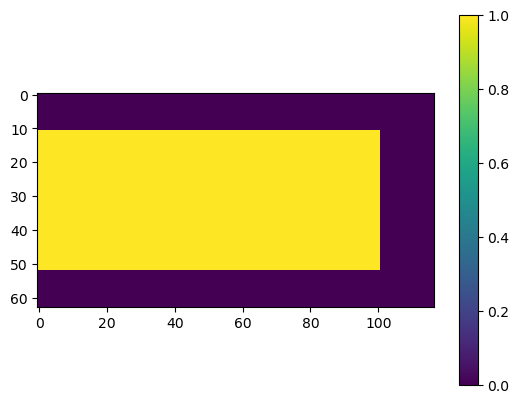

In [21]:
p = plt.imshow(ds_abs[100,:,:]); plt.colorbar(p)

In [12]:
ds_abs 

<xarray.DataArray 'MIDTROPp' (time: 13464, lat: 41, lon: 101)>
dask.array<getitem, shape=(13464, 41, 101), dtype=float32, chunksize=(242, 41, 101), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-05-01 ... 2021-09-30T00:00:00.900000
  * lon      (lon) float32 -70.0 -69.0 -68.0 -67.0 -66.0 ... 27.0 28.0 29.0 30.0
  * lat      (lat) float32 20.0 21.0 22.0 23.0 24.0 ... 56.0 57.0 58.0 59.0 60.0

In [10]:
ds_abs.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:   (time: 51408, lon: 360, lat: 96)
Coordinates:
  * time      (time) datetime64[ns] 1980-05-01 ... 2021-09-30T02:00:00.100000
  * lon       (lon) float32 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
  * lat       (lat) float32 -6.0 -5.0 -4.0 -3.0 -2.0 ... 86.0 87.0 88.0 89.0
Data variables:
    GT800p    (time, lat, lon) float32 dask.array<chunksize=(248, 96, 360), meta=np.ndarray>
    MIDTROPp  (time, lat, lon) float32 dask.array<chunksize=(248, 96, 360), meta=np.ndarray>
    LT400p    (time, lat, lon) float32 dask.array<chunksize=(248, 96, 360), meta=np.ndarray>>

In [8]:
ds_abs.lat

<xarray.DataArray 'lat' (lat: 96)>
array([-6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21.,
       22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.,
       50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.,
       64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89.],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -6.0 -5.0 -4.0 -3.0 -2.0 ... 85.0 86.0 87.0 88.0 89.0

In [44]:
    ds_abs = xr.open_dataarray(scr_data+var+'_clim.nc').load().pad(lon=(0,61),lat=(41,41),constant_values=np.nan)

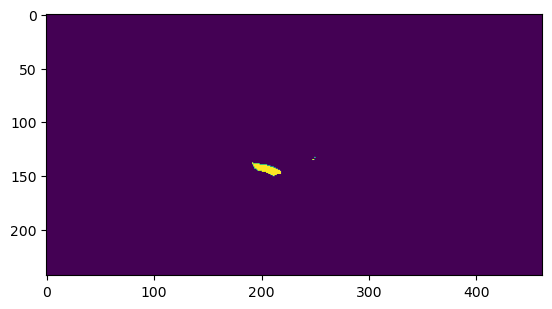

In [57]:
plt.imshow(ds_abs.isel(time=100))#.mean(dim='time',skipna=True)

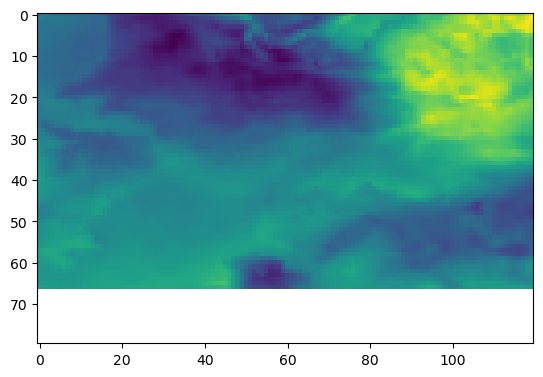

In [35]:
plt.imshow(anom_slices.isel(events=100,time=5))

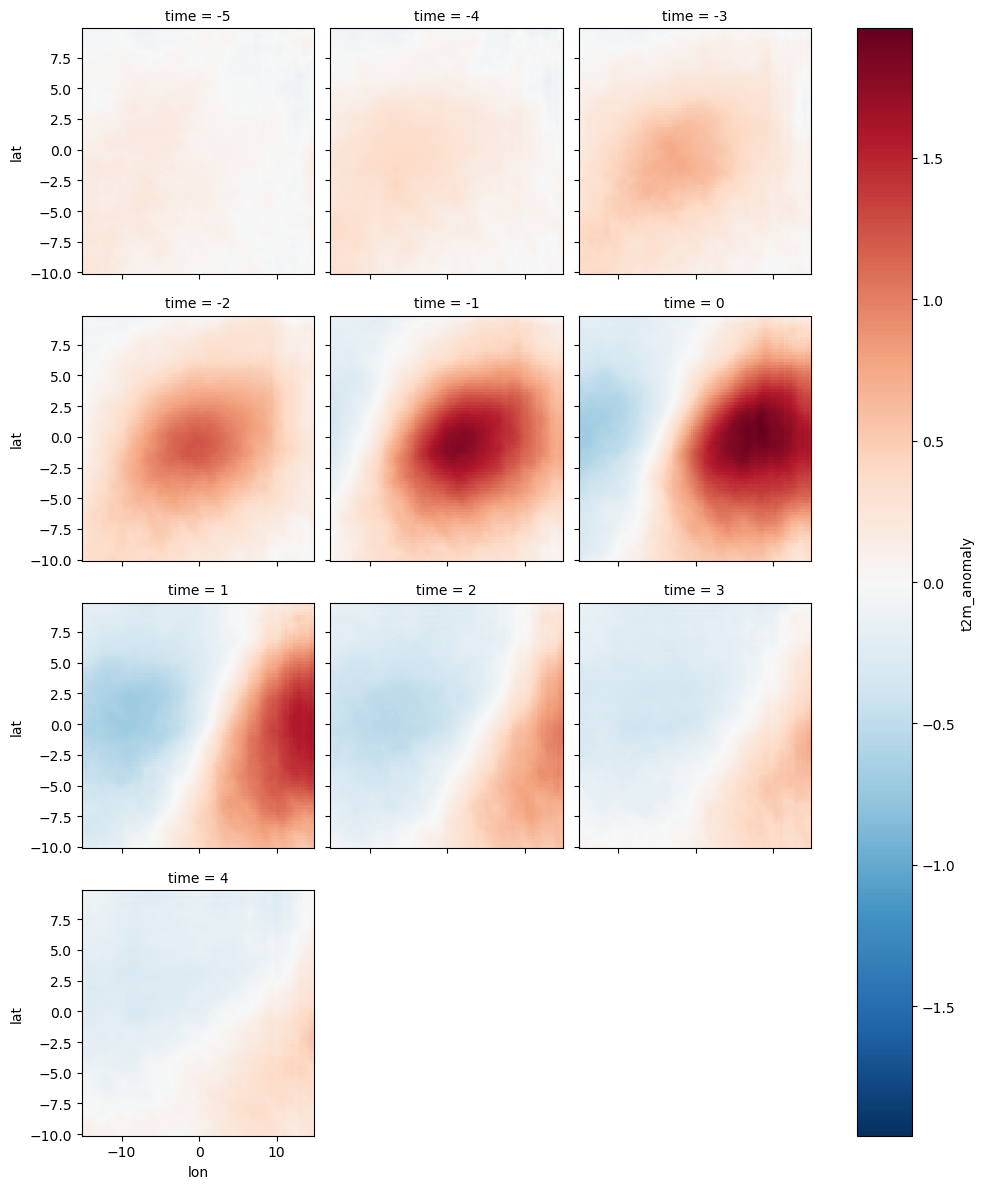

In [37]:

anom_composite.plot(x="lon", y="lat", col='time',col_wrap=3)

/tmp/ipykernel_501918/2402950297.py:4: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


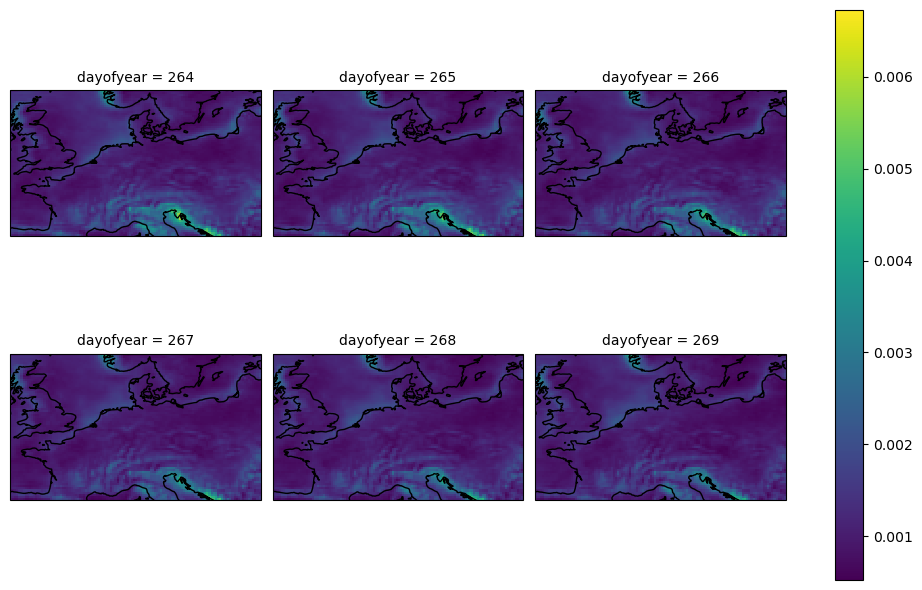

In [129]:
import cartopy.crs as ccrs
projection = ccrs.PlateCarree()
p = clim.isel(dayofyear=slice(0,6)).plot(x="lon", y="lat", col="dayofyear",col_wrap=3, subplot_kws={'projection':ccrs.PlateCarree()},transform=ccrs.PlateCarree())
for ax in p.axes.flat:
    ax.coastlines()